In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv(r"File_path")
df.head()

,customer_id,surname,credit_score,geography,gender,age,estimated_salary,balance,num_of_products,has_cr_card,tenure,is_active_member,churned
0,15634602,Hargrave,619,France,Female,42.0,101348.88,0.00,1,1,2,1,1
1,15647311,Hill,608,Spain,Female,41.0,112542.58,83807.86,1,1,1,1,0
2,15619304,Onio,502,France,Female,42.0,113931.57,159660.80,3,0,8,0,1
3,15701354,Boni,699,France,Female,39.0,93826.63,0.00,2,0,1,0,0
4,15737888,Mitchell,850,Spain,Female,43.0,79084.10,125510.82,1,1,2,1,0


In [4]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9997 non-null   int64  
 1   surname           9997 non-null   object 
 2   credit_score      9997 non-null   int64  
 3   geography         9997 non-null   object 
 4   gender            9997 non-null   object 
 5   age               9997 non-null   float64
 6   estimated_salary  9997 non-null   float64
 7   balance           9997 non-null   float64
 8   num_of_products   9997 non-null   int64  
 9   has_cr_card       9997 non-null   int64  
 10  tenure            9997 non-null   int64  
 11  is_active_member  9997 non-null   int64  
 12  churned           9997 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1015.4+ KB


,customer_id,surname,credit_score,geography,gender,age,estimated_salary,balance,num_of_products,has_cr_card,tenure,is_active_member,churned
count,9.997000e+03,9997,9997.000000,9997,9997,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
unique,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,5013,5456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,NaN,650.545364,NaN,NaN,38.922077,100092.222656,76482.679807,1.530359,0.515055,5.013204,0.515055,0.203761
std,7.193443e+04,NaN,96.657932,NaN,NaN,10.489072,57518.775702,62397.174721,0.581669,0.499798,2.892364,0.499798,0.402814
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,11.580000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,50974.570000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,1.569073e+07,NaN,652.000000,NaN,NaN,37.000000,100236.020000,97188.620000,1.000000,1.000000,5.000000,1.000000,0.000000
75%,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,149399.700000,127642.440000,2.000000,1.000000,7.000000,1.000000,0.000000


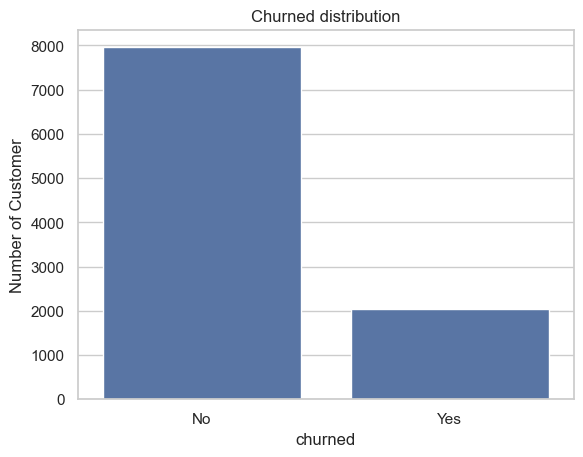

In [17]:
sns.countplot(x='churned', data=df)
plt.xticks([0,1],['No', 'Yes'])
plt.ylabel("Number of Customer")
plt.title('Churned distribution')
plt.show()

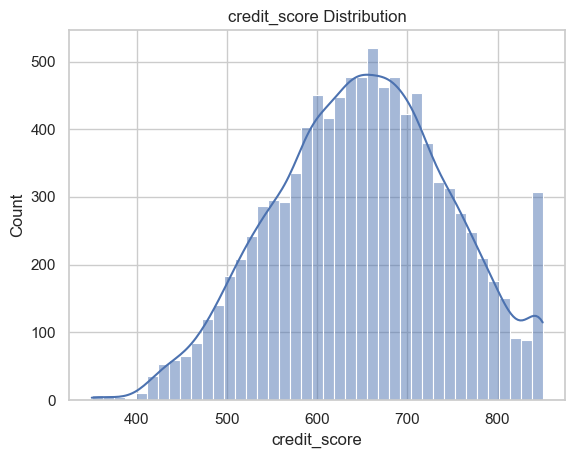

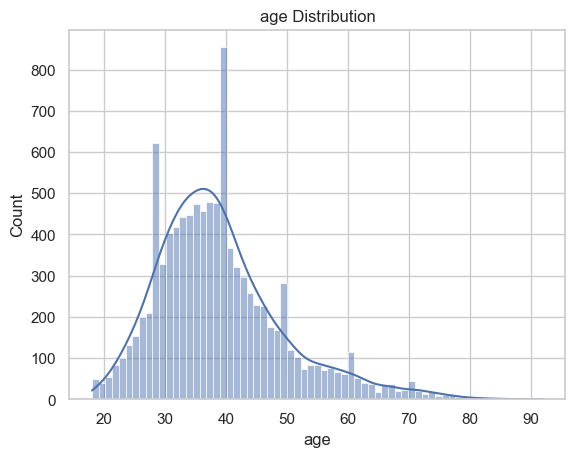

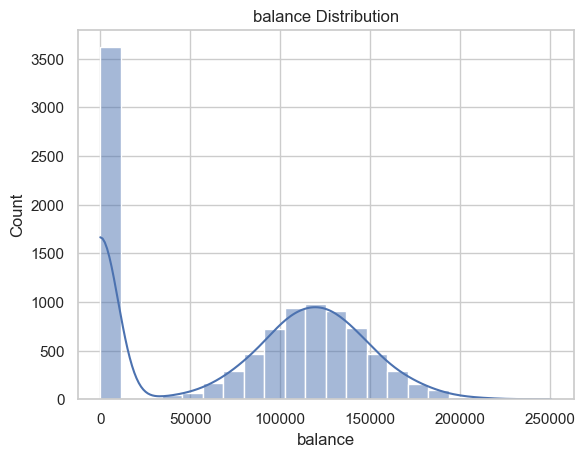

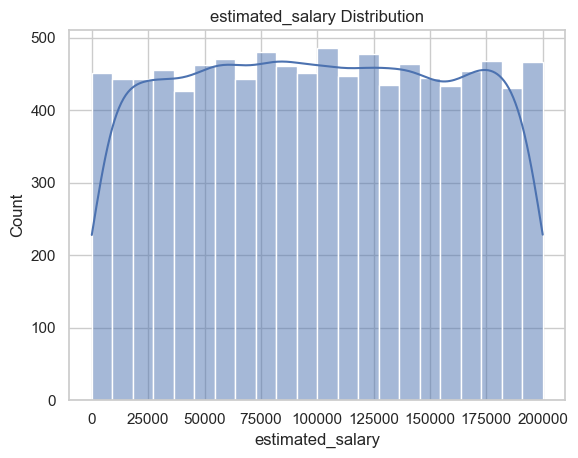

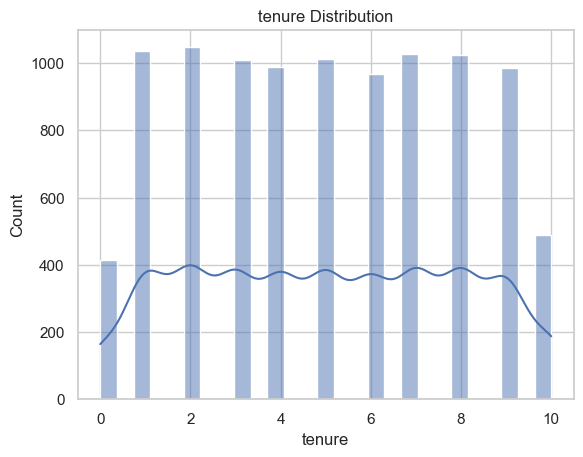

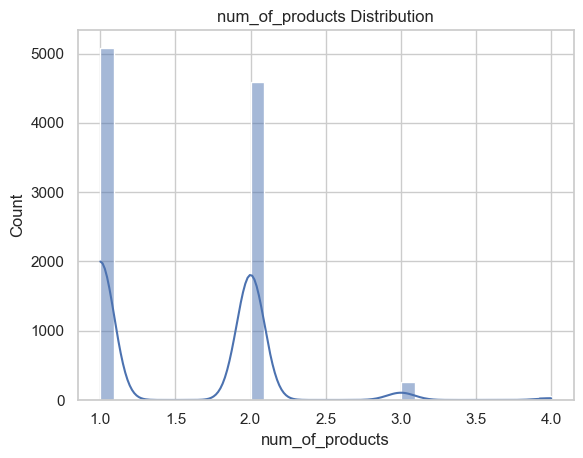

In [33]:
num_cols = ['credit_score', 'age', 'balance', 'estimated_salary', 'tenure', 'num_of_products']

for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.show()

In [16]:
zero_balance_count = (df['balance'] == 0).sum()
print("Number of customers with 0 balance = " , zero_balance_count)
total_customers = len(df['balance'])
print("percentage of zero balance customers from total = ", (zero_balance_count/total_customers)*100)

Number of customers with 0 balance =  3616
percentage of zero balance customers from total =  36.17085125537661


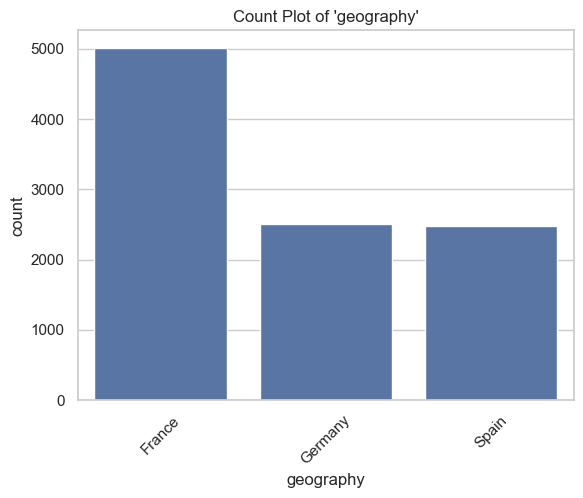

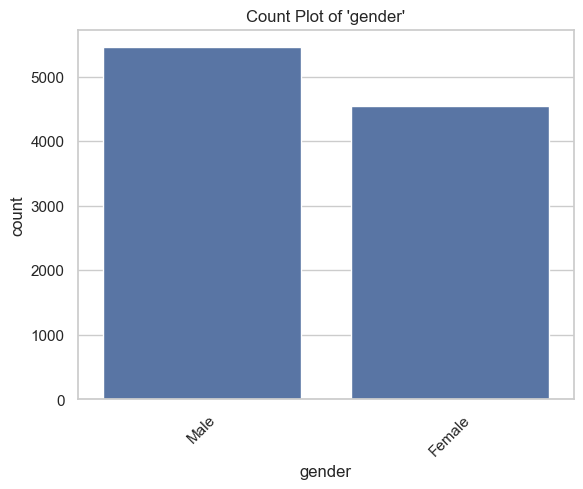

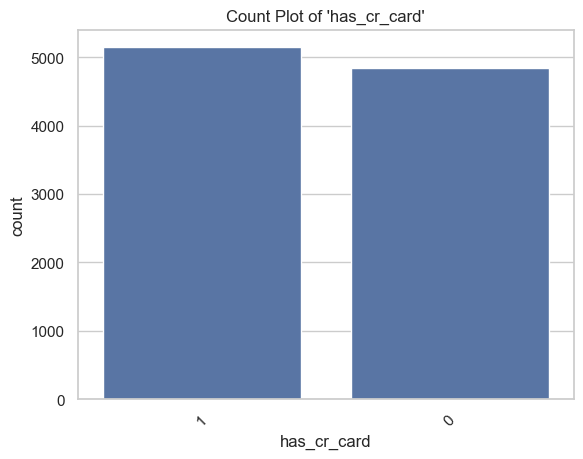

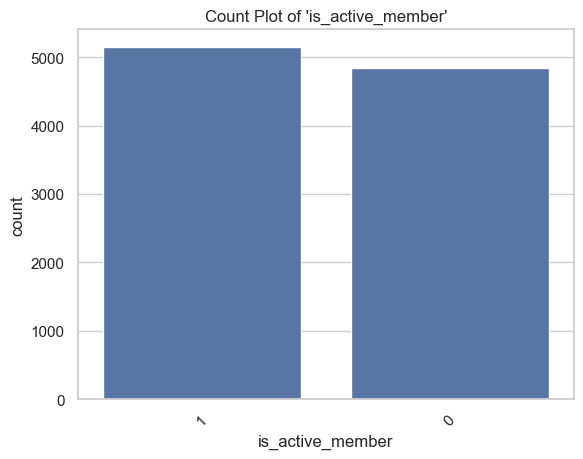

In [30]:
category = ['geography', 'gender', 'has_cr_card', 'is_active_member']

for column in category:
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f"Count Plot of '{column}'")
    plt.xticks(rotation=45)
    plt.show()

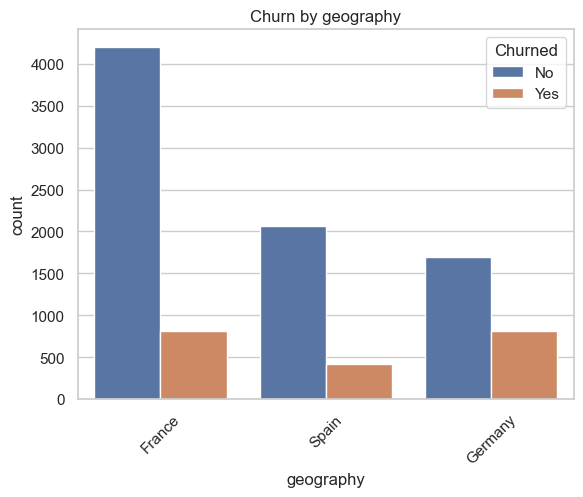

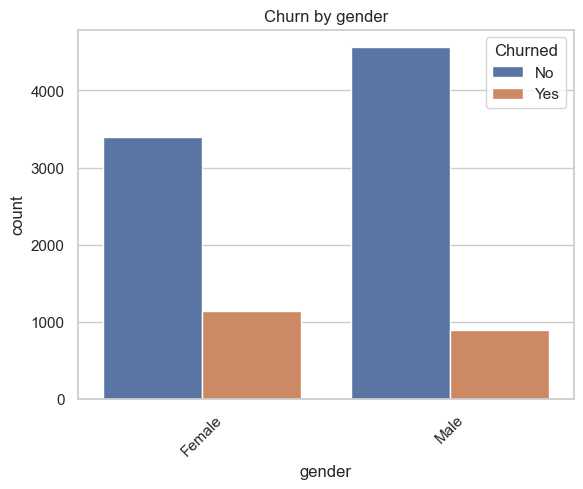

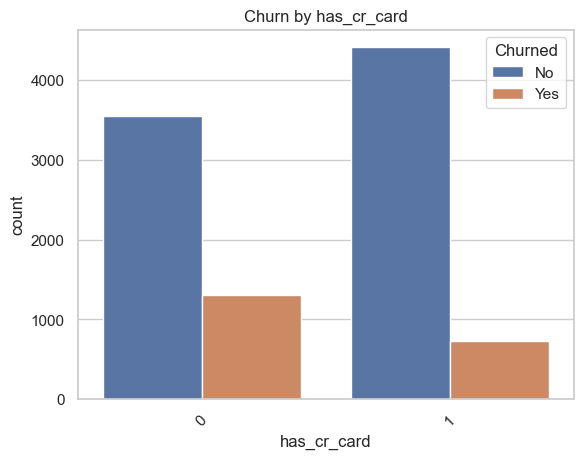

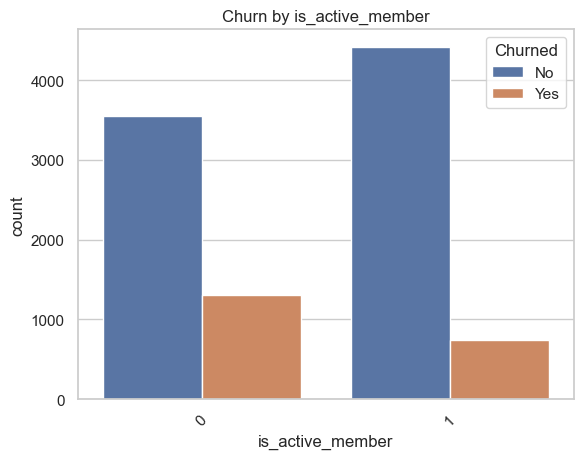

In [33]:
for column in category:
    sns.countplot(data=df, x=column, hue='churned')
    plt.title(f"Churn by {column}")
    plt.xticks(rotation=45)
    plt.legend(title="Churned", labels=["No", "Yes"])
    plt.show()


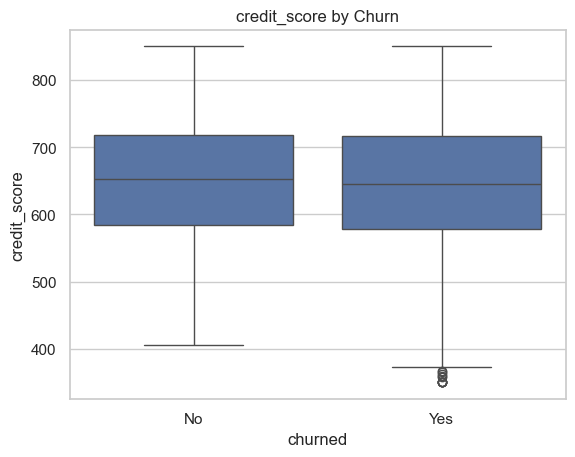

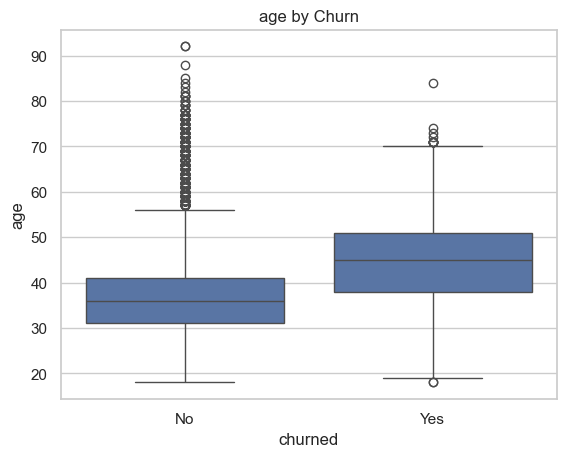

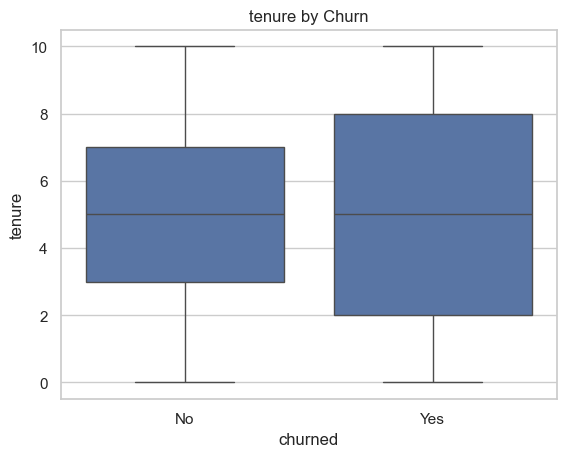

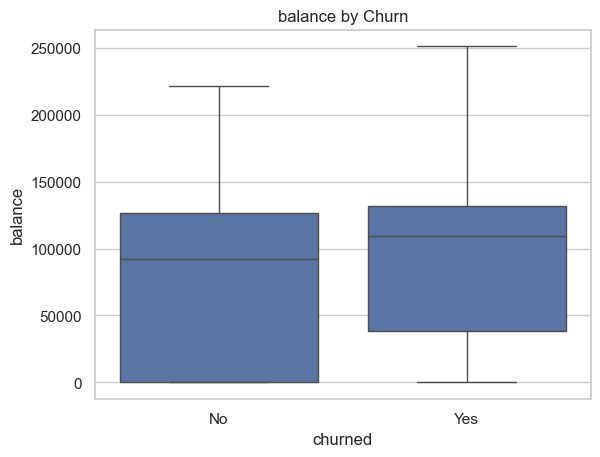

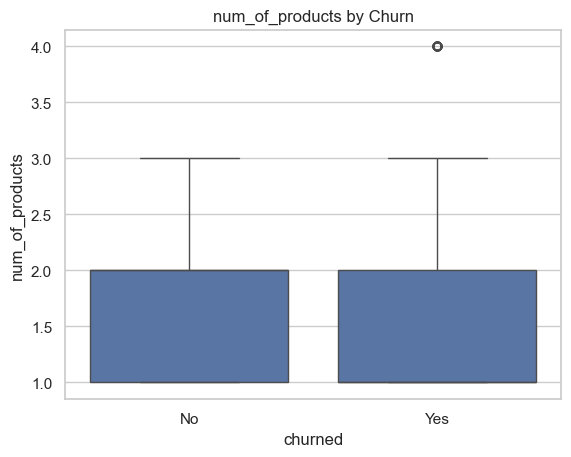

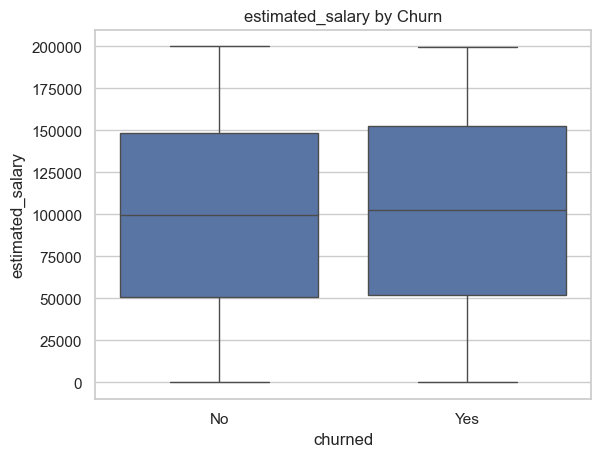

In [35]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

for column in numeric:
    sns.boxplot(data=df, x='churned', y=column)
    plt.title(f"{column} by Churn")
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()

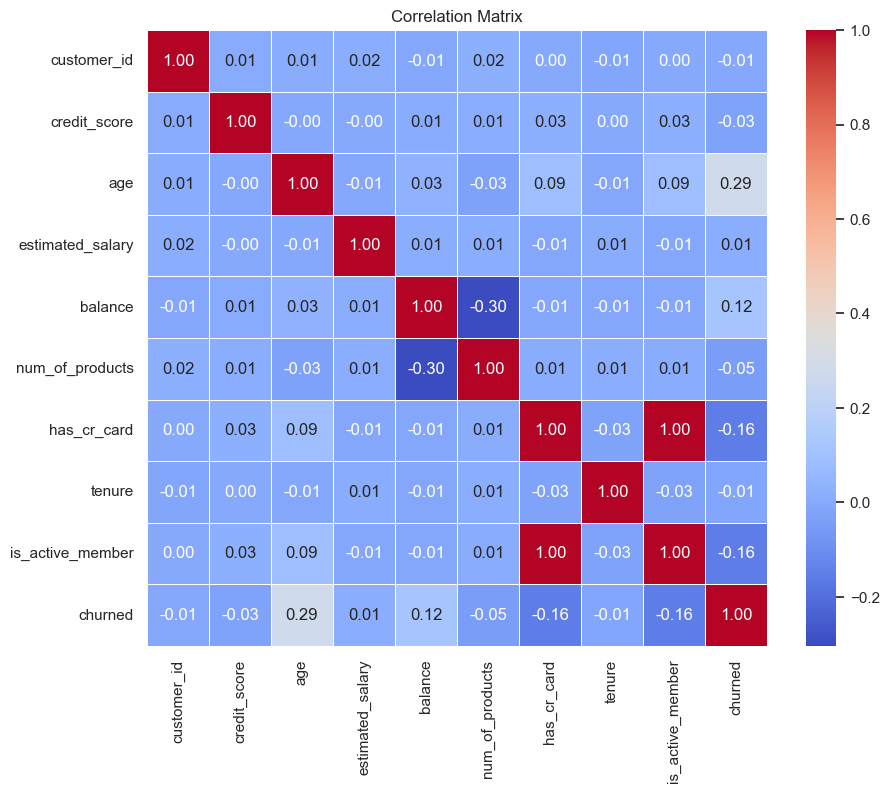

In [41]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()